In [1]:
%matplotlib inline
%autosave 0
%load_ext autoreload
%autoreload 2

Autosave disabled


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from dtrace import rpath, dpath
from Associations import Association
from dtrace.Preliminary import Preliminary, DrugPreliminary, CrisprPreliminary

### Import data-sets

In [3]:
datasets = Association()

/Users/eg14/anaconda3/envs/crispy/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3267: DtypeWarning: Columns (7,28) have mixed types. Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


[2019-02-21 15:50:49,784 - INFO]: #(Samples)=500
[2019-02-21 15:50:52,016 - INFO]: #(Drugs)=579; #(Genes)=16818; #(Genomic)=536; 


## Principal Component Analysis (PCA)

Perform PCA on the drug-response and CRISPR-Cas9 data-sets both per drug/gene and per samples.

In [3]:
pca_drug = Preliminary.perform_pca(datasets.drespo)
pca_crispr = Preliminary.perform_pca(datasets.crispr)

In [4]:
for n, pcas in [("drug", pca_drug), ("crispr", pca_crispr)]:
    for by in pcas:
        pcas[by]["pcs"].round(5).to_csv(f"{dpath}/{n}_pca_{by}_pcs.csv")

## Growth-rate correlation analysis

Correlation of cell lines growth rates (unperturbed) with drug-response (ln IC50).

In [5]:
g_corr = datasets.drespo_obj.growth_corr(
    datasets.drespo, datasets.samplesheet.samplesheet["growth"]
)
g_corr.to_csv(f"{dpath}/drug_growth_correlation.csv", index=False)

Correlation of cell lines growth rates (unperturbed) with CRISPR-Cas9 (scaled log2 fold-change; median essential = -1)

In [6]:
c_corr = datasets.crispr_obj.growth_corr(
    datasets.crispr, datasets.samplesheet.samplesheet["growth"]
)
c_corr.to_csv(f"{dpath}/crispr_growth_correlation.csv", index=False)

## Strong viability responses per compound

Count for each compound the number of IC50s that are lower than 50% of the maximum concentration used for the
respective compound

In [7]:
num_resp = pd.Series(
    {
        drug: (
            datasets.drespo.loc[drug].dropna()
            < np.log(datasets.drespo_obj.maxconcentration[drug] * 0.5)
        ).sum()
        for drug in datasets.drespo.index
    }
).reset_index()
num_resp.columns = ["DRUG_ID", "DRUG_NAME", "VERSION", "n_resp"]
num_resp.to_csv(f"{dpath}/drug_number_responses.csv", index=False)

# Drug-response

Drug-response (IC50s) measurements across cell lines cumulative distribution

/Users/eg14/anaconda3/envs/crispy/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


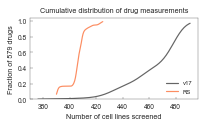

In [4]:
DrugPreliminary.histogram_drug(datasets.drespo.count(1))
plt.gcf().set_size_inches(3, 1.5)
plt.savefig(
    f"{rpath}/preliminary_drug_histogram_drug.pdf",
    bbox_inches="tight",
    transparent=True,
)
plt.figure(figsize=(3, 2), dpi=300)
plt.show()

Cumulative distribution of strong drug-response measurements. Strong response measurements are defined as IC50 < 50% Max. concentration

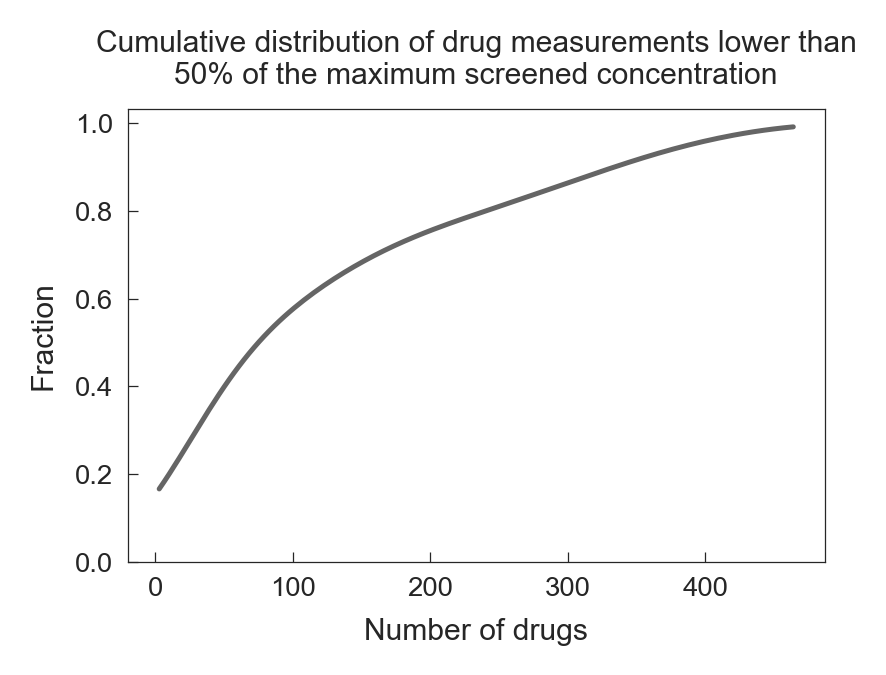

In [9]:
plt.figure(figsize=(3, 2), dpi=300)
DrugPreliminary.histogram_drug_response(num_resp)
plt.savefig(
    f"{rpath}/preliminary_drug_response_histogram.pdf",
    bbox_inches="tight",
    transparent=True,
)

## Cumulative distribution of samples with measurements across all compounds screened

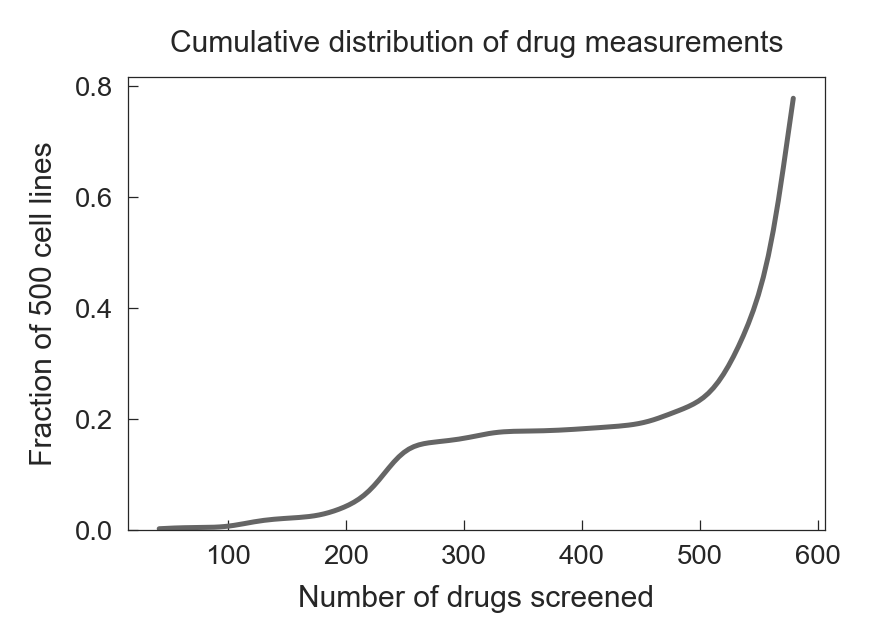

In [10]:
plt.figure(figsize=(3, 2), dpi=300)
DrugPreliminary.histogram_sample(datasets.drespo.count(0))
plt.savefig(
    f"{rpath}/preliminary_drug_histogram_samples.pdf",
    bbox_inches="tight",
    transparent=True,
)

## Principal components of drugs

/Users/eg14/anaconda3/envs/crispy/lib/python3.6/site-packages/seaborn/axisgrid.py:1241: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(UserWarning(msg))


<Figure size 1200x1200 with 0 Axes>

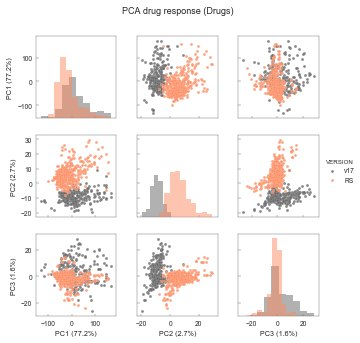

In [11]:
plt.figure(figsize=(4, 4), dpi=300)
DrugPreliminary.pairplot_pca_by_rows(pca_drug)
plt.suptitle("PCA drug response (Drugs)", y=1.05, fontsize=9)
plt.savefig(
    f"{rpath}/preliminary_drug_pca_pairplot.pdf", bbox_inches="tight", transparent=True
)

## Principal components of samples in the drug-response

/Users/eg14/anaconda3/envs/crispy/lib/python3.6/site-packages/seaborn/axisgrid.py:1241: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(UserWarning(msg))


<Figure size 1200x1200 with 0 Axes>

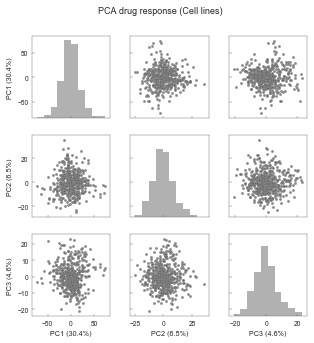

In [12]:
plt.figure(figsize=(4, 4), dpi=300)
DrugPreliminary.pairplot_pca_by_columns(pca_drug)
plt.suptitle("PCA drug response (Cell lines)", y=1.05, fontsize=9)
plt.savefig(
    f"{rpath}/preliminary_drug_pca_pairplot_samples.pdf",
    bbox_inches="tight",
    transparent=True,
)

## Principal components of samples in the drug-response coloured by cancer type

/Users/eg14/anaconda3/envs/crispy/lib/python3.6/site-packages/seaborn/axisgrid.py:1241: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(UserWarning(msg))


<Figure size 1200x1200 with 0 Axes>

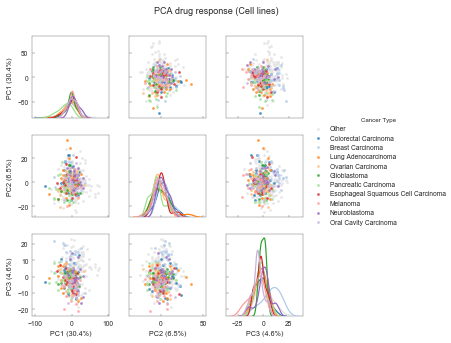

In [13]:
plt.figure(figsize=(4, 4), dpi=300)
DrugPreliminary.pairplot_pca_samples_cancertype(
    pca_drug, datasets.samplesheet.samplesheet["cancer_type"]
)
plt.suptitle("PCA drug response (Cell lines)", y=1.05, fontsize=9)
plt.savefig(
    f"{rpath}/preliminary_drug_pca_pairplot_cancertype.pdf",
    bbox_inches="tight",
    transparent=True,
)

## Samples drug-response PC1 correlation with growth-rate

/Users/eg14/anaconda3/envs/crispy/lib/python3.6/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


<Figure size 600x600 with 0 Axes>

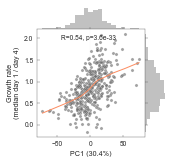

In [14]:
plt.figure(figsize=(2, 2), dpi=300)
DrugPreliminary.corrplot_pcs_growth(
    pca_drug, datasets.samplesheet.samplesheet["growth"], "PC1"
)
plt.gcf().set_size_inches(2, 2)
plt.savefig(
    f"{rpath}/preliminary_drug_pca_growth_corrplot.pdf",
    bbox_inches="tight",
    transparent=True,
)

## Histogram of samples drug-response PC1 correlation with growth-rate

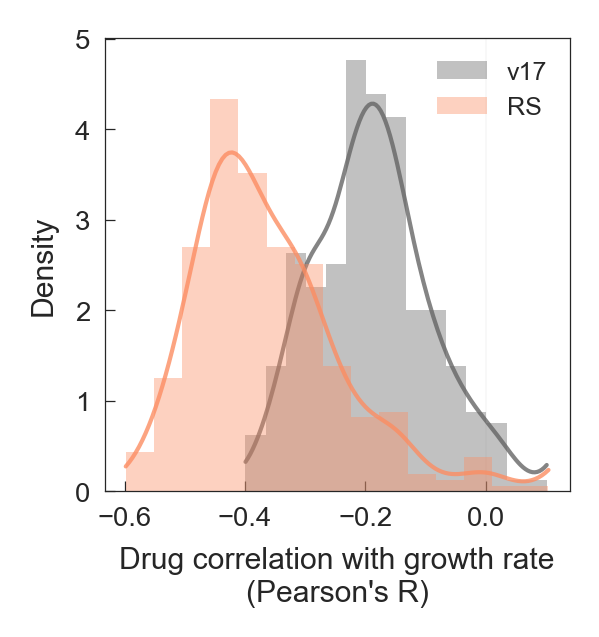

In [15]:
plt.figure(figsize=(2, 2), dpi=300)
DrugPreliminary.growth_correlation_histogram(g_corr)
plt.savefig(
    f"{rpath}/preliminary_drug_pca_growth_corrplot_histogram.pdf",
    bbox_inches="tight",
    transparent=True,
)

## Top correlated drugs with growth-rate

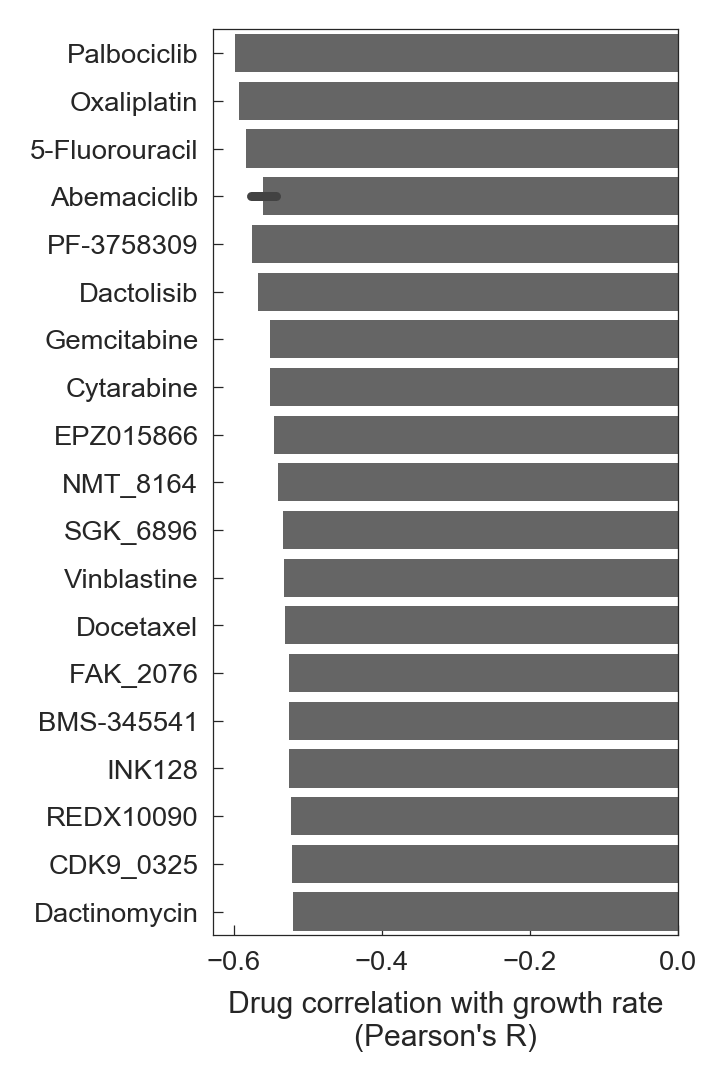

In [16]:
plt.figure(figsize=(2, 4), dpi=300)
DrugPreliminary.growth_correlation_top_drugs(g_corr)
plt.savefig(
    f"{rpath}/preliminary_drug_pca_growth_corrplot_top.pdf",
    bbox_inches="tight",
    transparent=True,
)

# CRISPR-Cas9

## Principal components of the genes in the CRISPR-Cas9 data-set

/Users/eg14/anaconda3/envs/crispy/lib/python3.6/site-packages/seaborn/axisgrid.py:1241: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(UserWarning(msg))


<Figure size 1200x1200 with 0 Axes>

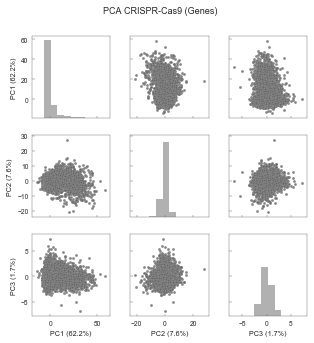

In [17]:
plt.figure(figsize=(4, 4), dpi=300)
CrisprPreliminary.pairplot_pca_by_rows(pca_crispr, hue=None)
plt.suptitle("PCA CRISPR-Cas9 (Genes)", y=1.05, fontsize=9)
plt.savefig(
    f"{rpath}/preliminary_crispr_pca_pairplot.png",
    bbox_inches="tight",
    transparent=True,
    dpi=300,
)

## Principal components of the samples in the CRISPR-Cas9 data-set

/Users/eg14/anaconda3/envs/crispy/lib/python3.6/site-packages/seaborn/axisgrid.py:1241: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(UserWarning(msg))


<Figure size 1200x1200 with 0 Axes>

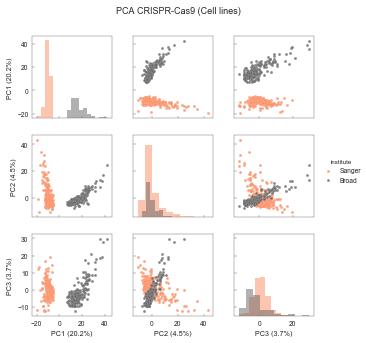

In [18]:
plt.figure(figsize=(4, 4), dpi=300)
CrisprPreliminary.pairplot_pca_by_columns(
    pca_crispr, hue="institute", hue_vars=datasets.samplesheet.samplesheet["institute"]
)
plt.suptitle("PCA CRISPR-Cas9 (Cell lines)", y=1.05, fontsize=9)
plt.savefig(
    f"{rpath}/preliminary_crispr_pca_pairplot_samples.pdf",
    bbox_inches="tight",
    transparent=True,
)

## Principal components of the samples in the CRISPR-Cas9 data-set coloured by cancer type

/Users/eg14/anaconda3/envs/crispy/lib/python3.6/site-packages/seaborn/axisgrid.py:1241: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(UserWarning(msg))


<Figure size 1200x1200 with 0 Axes>

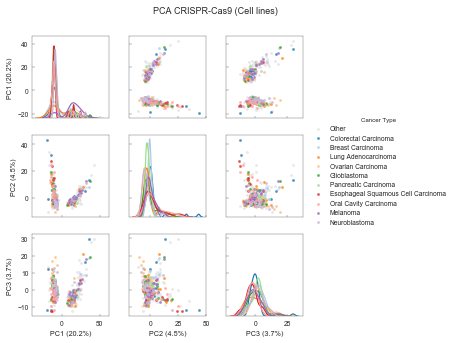

In [19]:
plt.figure(figsize=(4, 4), dpi=300)
CrisprPreliminary.pairplot_pca_samples_cancertype(
    pca_crispr, datasets.samplesheet.samplesheet["cancer_type"]
)
plt.suptitle("PCA CRISPR-Cas9 (Cell lines)", y=1.05, fontsize=9)
plt.savefig(
    f"{rpath}/preliminary_crispr_pca_pairplot_cancertype.pdf",
    bbox_inches="tight",
    transparent=True,
)

## CRISPR samples principal component correlation with growth rates

/Users/eg14/anaconda3/envs/crispy/lib/python3.6/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


<Figure size 600x600 with 0 Axes>

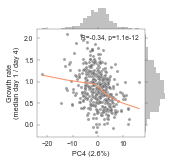

In [20]:
plt.figure(figsize=(2, 2), dpi=300)
CrisprPreliminary.corrplot_pcs_growth(
    pca_crispr, datasets.samplesheet.samplesheet["growth"], "PC4"
)
plt.gcf().set_size_inches(2, 2)
plt.savefig(
    f"{rpath}/preliminary_crispr_pca_growth_corrplot.pdf",
    bbox_inches="tight",
    transparent=True,
)

## CRISPR gene principal component correlation with essentiality

Correlation CRISPR genes PC1 with number of times a gene has a strong essentiality profile across the cell lines.
Strong essentiality is defined as true if: scaled log2 FC < -0.5 (meaning 50% of the effect of known essential genes).

/Users/eg14/anaconda3/envs/crispy/lib/python3.6/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


<Figure size 600x600 with 0 Axes>

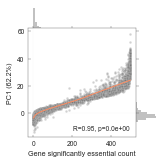

In [21]:
plt.figure(figsize=(2, 2), dpi=300)
CrisprPreliminary.corrplot_pcs_essentiality(pca_crispr, datasets.crispr, "PC1")
plt.gcf().set_size_inches(2, 2)
plt.savefig(
    f"{rpath}/preliminary_crispr_pca_essentiality_corrplot.pdf",
    bbox_inches="tight",
    transparent=True,
)